<a href="https://colab.research.google.com/github/NeurasysAI/Knee_X-Rays_CNN/blob/main/NeuraSys_Knee_X_Rays_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

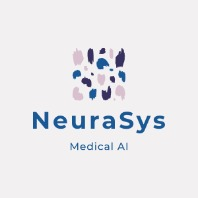



The dataset consists of 1650 digital X-ray images of knee joint which are collected from well reputed hospitals and diagnostic centres. The X-ray images are acquired using PROTEC PRS 500E X-ray machine. Original images are 8-bit grayscale image.  Each radiographic knee X-ray image is manually annotated /labelled as per Kellgren and Lawrence grades by 2 medical experts. A novel approach has been developed to automatically extract the Cartilage region (region of interest) based on density of pixels.
The target is to evaluate the performance of the deep learning algorithm to predict per Kellgren and Lawrence grades.

the Kellgren and Lawrence classification system:
grade 0 (normal): definite absence of x-ray changes of osteoarthritis
grade 1 (doubtful): doubtful joint space narrowing and possible osteophytic lipping
grade 2 (mid): definite osteophytes and possible joint space narrowing
grade 3 (moderate): moderate multiple osteophytes, definite narrowing of joint space and some sclerosis and possible deformity of bone ends
grade 4 (severe): large osteophytes, marked narrowing of joint space, severe sclerosis and definite deformity of bone ends.
he target is to evaluate the performance of the deep learning algorithm to predict per Kellgren and Lawrence grades.

## **Download Dataset from google storage**

Run the cell in order and follow steps

In [23]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gsutil cp gs://neurasys-datasets/Knee_X-Rays/Knee-X-RAYS_DataSet.npz .

In [ ]:
!gsutil cp gs://neurasys-datasets/Knee_X-Rays/Knee_XRays_CNN.h5 .

## **Import libraries**

In [28]:
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## **Load Dataset**

the data was processed where each image have shape 256x256 in grayscale.
After that, it was reshape and divided into 255.0 so that it can be processed by CNN


In [29]:
from numpy import *
x = np.load('/content/Knee-X-RAYS_DataSet.npz')
print(x.files)

['x_train', 'y_train', 'x_test', 'y_test']


## **Extrac Arrays From Dataset**

In [30]:
x_train = x['x_train']
x_test = x['x_test']
y_train = x['y_train']
y_test = x['y_test']

In [31]:
print("X train data shape:", x_train.shape)
print("Y train data shape:",y_train.shape)
print()
print("X test data shape:", x_test.shape)
print("Y test data shape:",y_test.shape)

X train data shape: (715, 256, 256, 1)
Y train data shape: (715, 5)

X test data shape: (179, 256, 256, 1)
Y test data shape: (179, 5)


## **Create Labels**

0.   Label 0 = Normal
1.   Label 1 = Doubtful
2.   Label 2 = Mid
3.   Label 3 = Moderate
4.   Label 4 = Severe






In [32]:
class_names = ['X-Rays Normal','X-Rays Doubtful','X-Rays Mid','X-Rays Moderate','X-Rays Severe']

## **View Images**

Can you try to change x_test['image number'] and y_test['image number']

X-Rays Doubtful


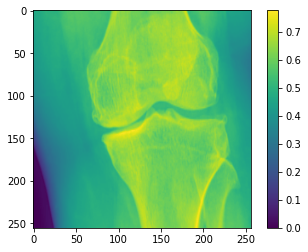

In [33]:
plt.figure()
plt.imshow(np.squeeze(x_test[23]))
print(class_names[np.argmax(y_test[23])])
plt.colorbar()
plt.grid(False)
plt.show()

## **Load Trained CNN (Convultional Neuronal Network)**

The model contains 29,666,437 parameters

In [34]:
path_model = '/content/Knee_XRays_CNN.h5'
new_model = load_model(path_model)

In [ ]:
new_model.summary()

## **Evaluate**

The CNN gets accuracy 98% & loss 0.6

In [ ]:
vaL_loss, val_accuracy= new_model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

## **Model Predictions**

Type a number in range 0 to 179, and add the number to variable X .This number will be the image to predict

In [38]:
X = 59

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

A.I predicts: X-Rays Moderate
Correct prediction for label 3 is X-Rays Moderate


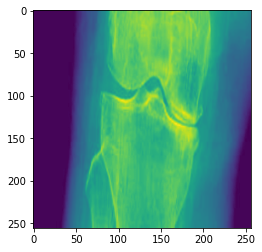

In [39]:
predictions_single = new_model.predict(img_single)
print('A.I predicts:',class_names[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',class_names[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.show()

## **Get the confusion matrix**

<Figure size 432x288 with 0 Axes>

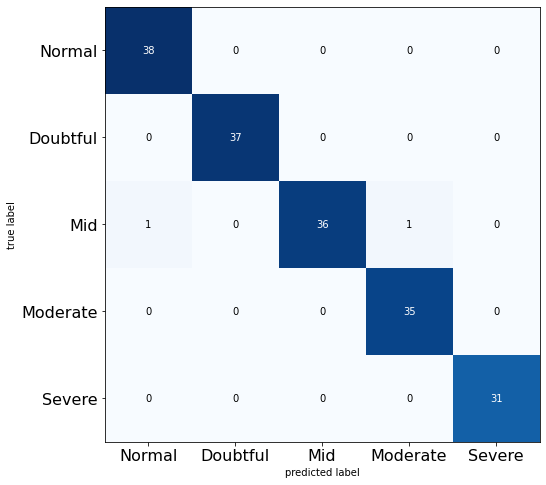

In [40]:
test_labels = np.argmax(y_test, axis=1)

predictions = new_model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

Thanks for this dataset:

Gornale, Prof. Shivanand; Patravali, Pooja (2020), “Digital Knee X-ray Images”, Mendeley Data, V1, doi: 10.17632/t9ndx37v5h.1


The files associated with this dataset are licensed under a Creative Commons Attribution 4.0 International license.
